In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [263]:
data = pd.read_csv('datasets/CDNOW.txt',header=None,sep=r'\s+',names=['user_id','buy_date','count','price'])
data['buy_date'] = pd.to_datetime(data['buy_date'].astype(str))
data.set_index('buy_date',inplace=True)

In [264]:
data.shape

(69659, 3)

In [265]:
data.head()

,user_id,count,price
buy_date,,,
1997-01-01,1,1,11.77
1997-01-12,2,1,12.00
1997-01-12,2,5,77.00
1997-01-02,3,2,20.76
1997-03-30,3,2,20.76


In [266]:
data['single_price'] = data['price']/data['count']
data_desc = data[['count','single_price']].describe()

In [267]:
data_desc

,count,single_price
count,69659.000000,69659.000000
mean,2.410040,15.459447
std,2.333924,8.735528
min,1.000000,0.000000
25%,1.000000,12.270000
50%,2.000000,13.990000
75%,3.000000,15.490000
max,99.000000,305.990000


In [268]:
single_price_lower= data_desc.single_price['mean'] - 1.96 * data_desc.single_price['std']
single_price_lower = single_price_lower if single_price_lower>0 else 0
single_price_upper = data_desc.single_price['mean'] + 1.96 * data_desc.single_price['std']

In [269]:
single_price_upper,single_price_lower

(32.58108178364721, 0)

In [271]:
a = data[data.single_price < single_price_upper]
a = a[a.single_price>single_price_lower]
data = a
data.shape

(67663, 4)

<IPython.core.display.Javascript object>


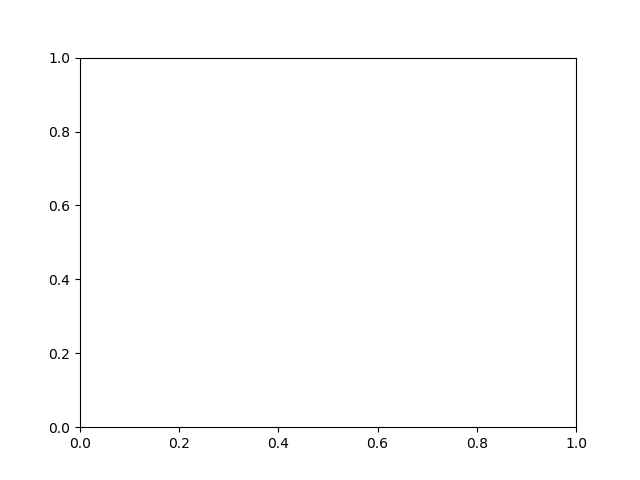

In [272]:
fig,ax = plt.subplots(2,1,)

In [274]:
data.groupby('buy_date')['single_price'].mean().plot(ax=ax[0])

In [275]:
data.groupby('buy_date')['count'].sum().plot(ax=ax[1])

In [276]:
uGp = data.groupby('user_id')

In [277]:
item_count = uGp['count'].agg(['sum','max']).sort_values(by='sum',ascending=False)
item_count['count_cum'] = item_count['sum'].cumsum()/item_count['sum'].sum()
item_count['max_rate'] = item_count['max']/item_count['sum']

In [278]:
item_count[:item_count.count_cum.values.searchsorted(0.5)]

,sum,max,count_cum,max_rate
user_id,,,,
14048,1033,15,0.006260,0.014521
7592,897,47,0.011696,0.052397
7983,536,23,0.014944,0.042910
7931,512,21,0.018046,0.041016
19339,368,24,0.020276,0.065217
22279,330,63,0.022276,0.190909
499,326,21,0.024252,0.064417
6569,315,18,0.026160,0.057143
3049,300,17,0.027978,0.056667


In [283]:
item_price = uGp['price'].agg(['sum','max']).sort_values(by='sum',ascending=False)
item_price['count_cum'] = item_price['sum'].cumsum()/item_price['sum'].sum()
item_price['max_rate'] = item_price['max']/item_price['sum']

In [282]:
item_price

,sum,max,count_cum,max_rate
user_id,,,,
7592,2807.560218,31.490000,0.002872,0.011216
22061,2031.690194,27.770000,0.004950,0.013668
7983,1967.169465,31.490000,0.006962,0.016008
14048,1755.943571,22.770000,0.008759,0.012967
3049,1629.307662,23.770000,0.010425,0.014589
499,1481.366972,31.990000,0.011941,0.021595
19597,1473.090000,22.990000,0.013448,0.015607
7145,1380.534167,29.770000,0.014860,0.021564
2484,1118.471333,31.490000,0.016004,0.028154


In [287]:
uGp['count'].agg(['sum','max','min','count']).sort_values(by='sum',ascending=False)

,sum,max,min,count
user_id,,,,
14048,1033,15,1,217
7592,897,47,1,186
7983,536,23,1,149
7931,512,21,1,61
19339,368,24,1,53
22279,330,63,1,13
499,326,21,1,108
6569,315,18,1,40
3049,300,17,1,116


In [318]:
data.reset_index(inplace=True)

In [319]:
data.head()

,index,buy_date,user_id,count,price,single_price
0,0,1997-01-01,1,1,11.77,11.77
1,1,1997-01-12,2,1,12.00,12.00
2,2,1997-01-12,2,5,77.00,15.40
3,3,1997-01-02,3,2,20.76,10.38
4,4,1997-03-30,3,2,20.76,10.38


In [335]:
def mean_interval(gb):
    d = gb.sort_values()
    return (d - d.shift(1)).mean()

In [336]:
user_ts = uGp['buy_date'].agg(['min','max',mean_interval])

In [337]:
user_ts

,min,max,mean_interval
user_id,,,
1,1997-01-01,1997-01-01,NaT
2,1997-01-12,1997-01-12,0 days 00:00:00
3,1997-01-02,1998-05-28,102 days 04:48:00
4,1997-01-01,1997-12-12,115 days 00:00:00
5,1997-01-01,1998-01-03,36 days 16:48:00
6,1997-01-01,1997-01-01,NaT
7,1997-01-01,1998-03-22,222 days 12:00:00
8,1997-01-01,1998-03-29,64 days 13:42:51.428571
9,1997-01-01,1998-06-08,261 days 12:00:00


In [338]:
from datetime import datetime,timedelta
user_ts['interval'] = (datetime.now() - user_ts['max']).apply(lambda x:x.days)

In [339]:
user_ts

,min,max,mean_interval,interval
user_id,,,,
1,1997-01-01,1997-01-01,NaT,8112
2,1997-01-12,1997-01-12,0 days 00:00:00,8101
3,1997-01-02,1998-05-28,102 days 04:48:00,7600
4,1997-01-01,1997-12-12,115 days 00:00:00,7767
5,1997-01-01,1998-01-03,36 days 16:48:00,7745
6,1997-01-01,1997-01-01,NaT,8112
7,1997-01-01,1998-03-22,222 days 12:00:00,7667
8,1997-01-01,1998-03-29,64 days 13:42:51.428571,7660
9,1997-01-01,1998-06-08,261 days 12:00:00,7589


In [346]:
def rebuy(t):
    x= t.sort_values()[:2]
    return x.values[1]-x.values[0] if len(x)==2 else None

In [347]:
first_rebuy = uGp['buy_date'].agg(rebuy)

In [348]:
first_rebuy

user_id
1            NaT
2         0 days
3        87 days
4        17 days
5        13 days
6            NaT
7       283 days
8        43 days
9       132 days
10           NaT
11       27 days
12           NaT
13           NaT
14           NaT
15           NaT
16      193 days
17           NaT
18           NaT
19      160 days
20       17 days
21       12 days
22           NaT
23           NaT
24      384 days
25      198 days
26       25 days
27        5 days
28       26 days
29       36 days
30       44 days
          ...   
23541        NaT
23542        NaT
23543        NaT
23544    51 days
23545        NaT
23546        NaT
23547    13 days
23548        NaT
23549        NaT
23550        NaT
23551    50 days
23552     9 days
23553     3 days
23554   313 days
23555   214 days
23556    77 days
23557        NaT
23558    54 days
23559    54 days
23560        NaT
23561   309 days
23562        NaT
23563   193 days
23564    57 days
23565        NaT
23566        NaT
23567        NaT
23568 

In [349]:
first_rebuy.describe()


count                       11455
mean     109 days 04:59:03.745089
std      122 days 10:28:05.162491
min               0 days 00:00:00
25%              16 days 00:00:00
50%              55 days 00:00:00
75%             169 days 00:00:00
max             533 days 00:00:00
Name: buy_date, dtype: object

In [351]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67663 entries, 0 to 67662
Data columns (total 6 columns):
index           67663 non-null int64
buy_date        67663 non-null datetime64[ns]
user_id         67663 non-null int64
count           67663 non-null int64
price           67663 non-null float64
single_price    67663 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 3.1 MB


In [352]:
data.set_index('buy_date',inplace=True)

In [357]:
data.index.to_period('M')

PeriodIndex(['1997-01', '1997-01', '1997-01', '1997-01', '1997-03', '1997-04',
             '1997-11', '1997-11', '1998-05', '1997-01',
             ...
             '1997-11', '1997-03', '1997-03', '1997-03', '1997-03', '1997-04',
             '1997-04', '1997-03', '1997-03', '1997-03'],
            dtype='period[M]', name='buy_date', length=67663, freq='M')

In [360]:
mdata = data.to_period('M')

In [367]:
def rebuy_rate(m):
    t = m.value_counts()
    return t[t>1].shape[0]/t.shape[0]
rebuy_rates = mdata.groupby(['buy_date'])['user_id'].agg(rebuy_rate)

<IPython.core.display.Javascript object>


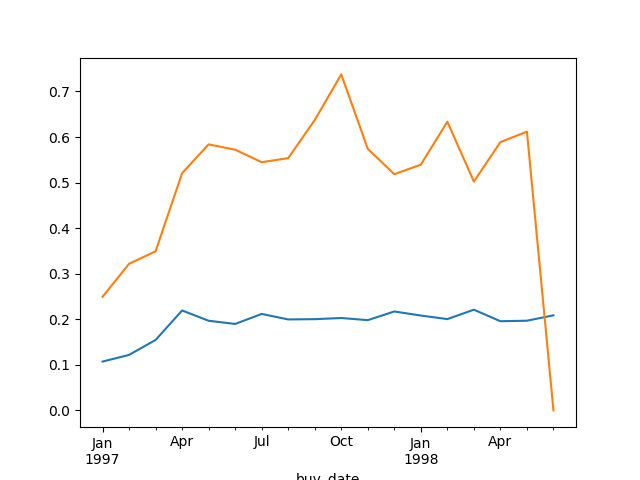

In [371]:
fig,ax = plt.subplots(1,1)
rebuy_rates.plot()

In [429]:
del mdata['one']

In [430]:
mdata.head()

,user_id,count,price,single_price
buy_date,,,,
1997-01,1,1,11.77,11.77
1997-01,2,1,12.00,12.00
1997-01,2,5,77.00,15.40
1997-01,3,2,20.76,10.38
1997-03,3,2,20.76,10.38


In [471]:
mdata.set_index('buy_date',inplace=True)
mdata['flag'] = 1
ndata = mdata.set_index(mdata.index - 1)

In [472]:
ndata = ndata.reset_index()

In [473]:
mdata = mdata.reset_index()

In [480]:
month_reserve_rate = pd.merge(mdata[['buy_date','user_id','flag']],ndata[['buy_date','user_id','flag']],on=['buy_date','user_id'],how='left').fillna(0).groupby('buy_date').agg(lambda g:g.flag_y.sum()/g.flag_x.sum())['user_id']

In [482]:
mdata.set_index('buy_date',inplace=True)

In [492]:
mdata.head()

,user_id,count,price,single_price
buy_date,,,,
1997-01,1,1,11.77,11.77
1997-01,2,1,12.00,12.00
1997-01,2,5,77.00,15.40
1997-01,3,2,20.76,10.38
1997-03,3,2,20.76,10.38


In [496]:
month_reserve_rate.plot()

In [497]:
mdata.sort_index(ascending=False)

,user_id,count,price,single_price
buy_date,,,,
1998-06,6804,2,27.48,13.740000
1998-06,5026,2,25.98,12.990000
1998-06,1556,2,28.48,14.240000
1998-06,21182,1,14.49,14.490000
1998-06,561,2,16.48,8.240000
1998-06,561,1,23.99,23.990000
1998-06,17314,2,22.98,11.490000
1998-06,15429,1,15.49,15.490000
1998-06,15429,1,17.99,17.990000


In [498]:
close_buy = mdata.ix[mdata.index.unique()[:3]]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [499]:
close_buy = close_buy[close_buy['count'] > 1]

In [500]:
close_buy.shape

(12373, 4)

In [505]:
close_buy[close_buy['count'] > 2].shape[0] / close_buy.shape[0] 

0.5634041865351976

In [507]:
close_buy[close_buy['count'] == 2].shape[0] / close_buy[close_buy['count'] > 2].shape[0]

0.7749246879931143

In [508]:
close_buy['count'].describe()

count    12373.000000
mean         3.481694
std          2.476549
min          2.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         43.000000
Name: count, dtype: float64